In [1]:
import sys
sys.path.append("../../src")
import auxiliary, models, constants
import numpy as np
from maneuvers import Maneuvers

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

## From small orbit to big orbit

In [2]:
coe,date = auxiliary.parseTle("../../suchai0.tle")
coe[2] = 1*np.pi/180
#----- SPACECRAFT DEFINITIONS -----
satellite = models.Spacecraft(3,1,10)
satellite.thruster = models.Thruster(thrust=50e-3,isp=3200)

maneuver = Maneuvers(coe,satellite,date)

maneuver.propagate(60*60*24*3,60)

maneuver.addPerturbation("thrust")
targetCoe = [13000e3,0.5,45*np.pi/180,None,None]
maneuver.setTargetRun(targetCoe)
maneuver.propagate(60*60*24*4.65,60)
maneuver.removePerturbation("thrust")

maneuver.propagate(60*60*24*2,60)

Propagating...from day  0.0  to  3.0
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  3.0  to  7.6499999999999995
A termination event occurred. (Status Code: 1)

Propagating...from day  7.199932785660941  to  9.199932785660941
A termination event occurred. (Status Code: 1)



------------MANEUVER REPORT-------------
----INITIAL CONDITIONS----
Date/Time:
  Initial Date: 2017-06-25 17:14:58

Spacecraft:
  Wet Mass: 		3 kg
  Dry Mass: 		1 kg
  Propellant Mass: 	2 kg
  Drag Area: 		10 m2
  Cd: 			2.2
  Cr: 			2

Thruster:
  Name/Model:		Generic Thruster
  Thrust (nominal):	0.05 N
  Isp (nominal):	3200 s
  Power (nominal):	1 W

Solar Panels:
  Name/Model:			Generic Solar Panel
  Number of Panels:		1
  Individual Area:		0.010000000000000002 m2
  Total Power (nominal):	2.8000000000000007 W

Battery:
  Name/Model:		Generic Battery
  Cells Configuration:	8P-1S
  Voltage:		3.7 V
  Capacity:		7200 mAh
  Energy:		26.64 Wh
  Charge Power:		29.6 W
  Discharge Power:	29.6 W

Orbit:
  Semi-major axis (a): 		6879.844551132894 km
  Eccentricity (e): 		0.001054
  Inclination (i): 		1.0 deg
  Argument of Perigee (omega): 	248.5815 deg
  RAAN (Omega): 		235.4612 deg
  True Anomaly (nu): 		110.95639 deg

----STAGE 1----
Date/Time:
  Elapsed Time:	3 days, 0:01:00.008962
  Date at

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

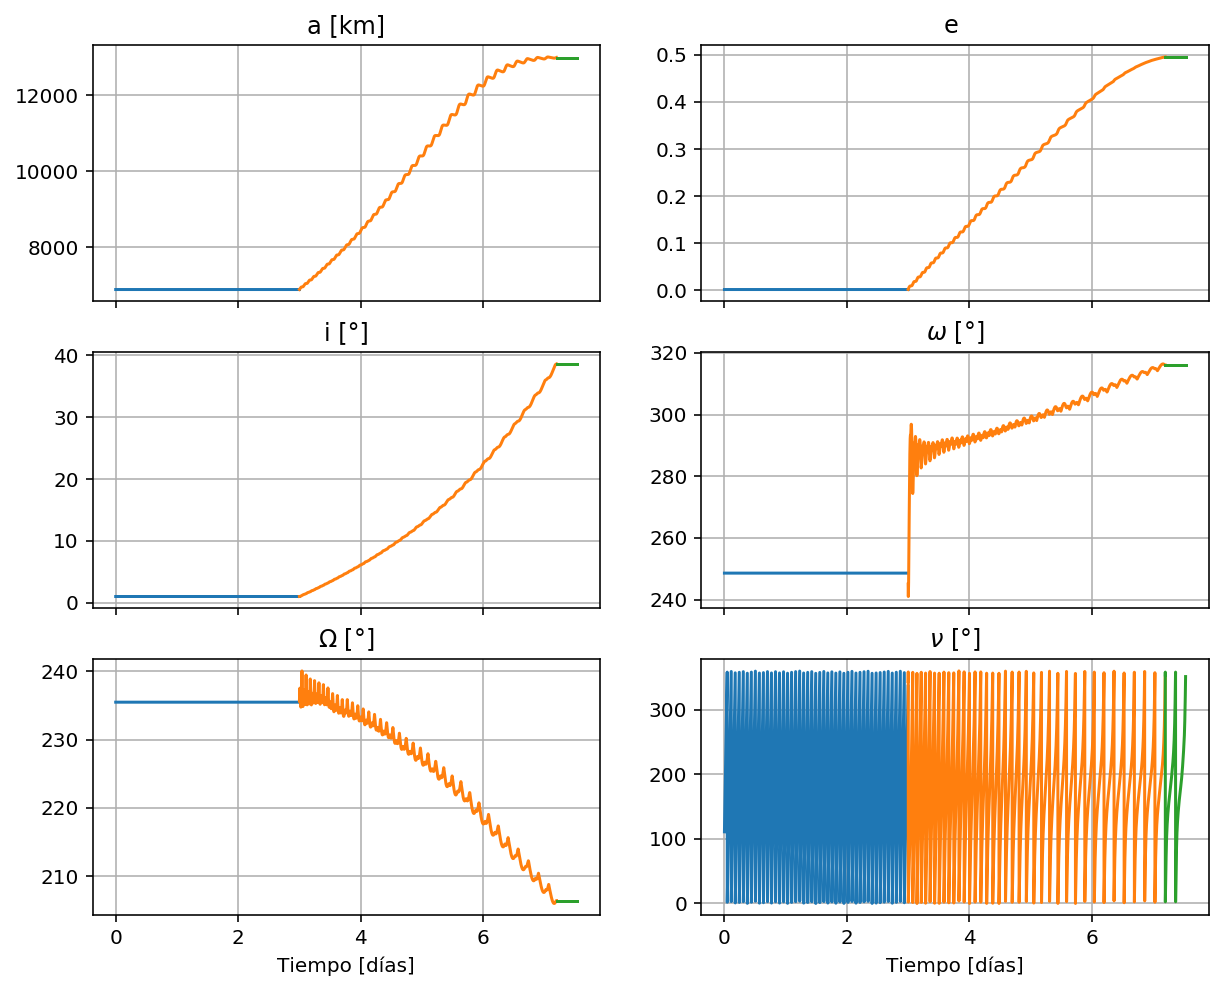

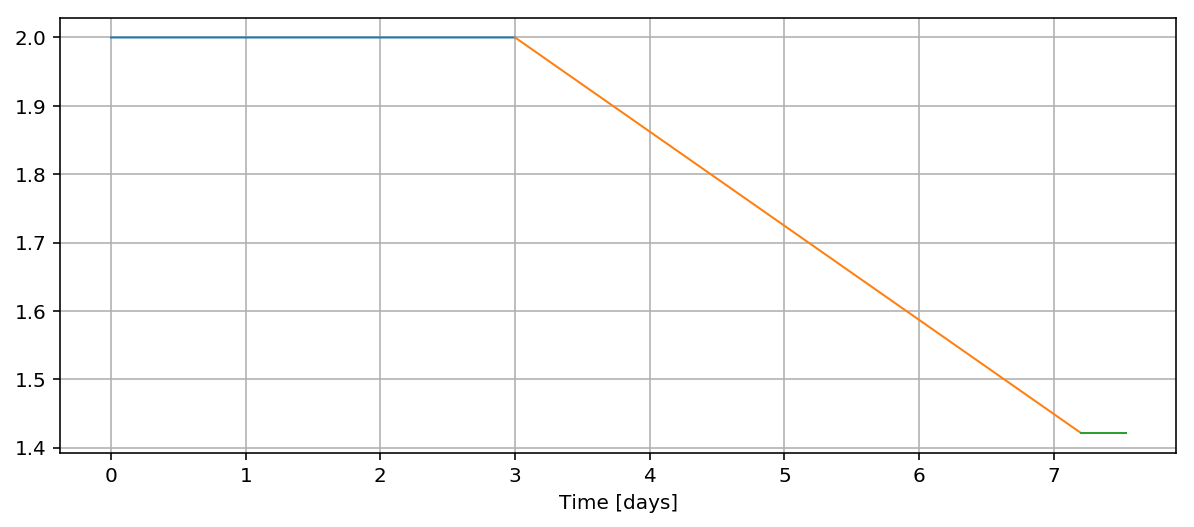

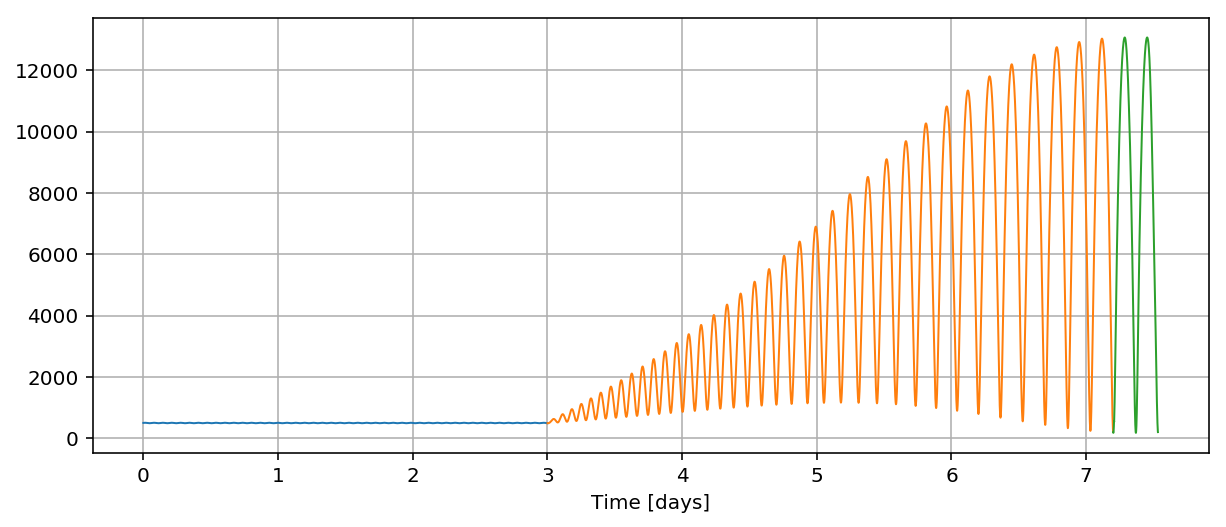

In [3]:
maneuver.makeReport();
display(maneuver.ipvPlot3D());
maneuver.plot("coe");
maneuver.plot("singleItem",maneuver.history.propMass);
maneuver.plot("singleItem",np.linalg.norm(maneuver.history.r,axis=1)/1000-constants.Re/1000);

## From big orbit to small orbit (reverse)

In [7]:
targetCoe,date = auxiliary.parseTle("../../suchai0.tle")
targetCoe[2] = 1*np.pi/180

coe = np.array(targetCoe)
coe[0] = 13000e3
coe[1] = 0.5
coe[2] = 45*np.pi/180
#coe[3] = 300*np.pi/180
#coe[4] = 300*np.pi/180
targetCoe[3] = None
targetCoe[4] = None
print("COE: ",coe)
print("Target coe: ",targetCoe)

#----- SPACECRAFT DEFINITIONS -----
satellite = models.Spacecraft(3,1,10)
satellite.thruster = models.Thruster(thrust=50e-3,isp=3200)

maneuver = Maneuvers(coe,satellite,date)
maneuver.terminalConditions["low_altitude"] = False
maneuver.propagate(60*60*24*3,60)

maneuver.addPerturbation("thrust")
maneuver.setTargetRun(targetCoe)
maneuver.propagate(60*60*24*5.59,60)
maneuver.removePerturbation("thrust")

maneuver.propagate(60*60*24*2,60)

COE:  [1.30000000e+07 5.00000000e-01 7.85398163e-01 4.33856563e+00
 4.10957320e+00 1.93655433e+00]
Target coe:  [6879844.551132894, 0.0010537, 0.017453292519943295, None, None, 1.9365543269347247]
Propagating...from day  0.0  to  3.0
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  3.0  to  8.59
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  8.59  to  10.59
The solver successfully reached the end of the integration interval. (Status Code: 0)



------------MANEUVER REPORT-------------
----INITIAL CONDITIONS----
Date/Time:
  Initial Date: 2017-06-25 17:14:58

Spacecraft:
  Wet Mass: 		3 kg
  Dry Mass: 		1 kg
  Propellant Mass: 	2 kg
  Drag Area: 		10 m2
  Cd: 			2.2
  Cr: 			2

Thruster:
  Name/Model:		Generic Thruster
  Thrust (nominal):	0.05 N
  Isp (nominal):	3200 s
  Power (nominal):	1 W

Solar Panels:
  Name/Model:			Generic Solar Panel
  Number of Panels:		1
  Individual Area:		0.010000000000000002 m2
  Total Power (nominal):	2.8000000000000007 W

Battery:
  Name/Model:		Generic Battery
  Cells Configuration:	8P-1S
  Voltage:		3.7 V
  Capacity:		7200 mAh
  Energy:		26.64 Wh
  Charge Power:		29.6 W
  Discharge Power:	29.6 W

Orbit:
  Semi-major axis (a): 		13000.0 km
  Eccentricity (e): 		0.5
  Inclination (i): 		45.0 deg
  Argument of Perigee (omega): 	248.5815 deg
  RAAN (Omega): 		235.4612 deg
  True Anomaly (nu): 		110.95639 deg

----STAGE 1----
Date/Time:
  Elapsed Time:	3 days, 0:01:00.011928
  Date at end of stage:

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

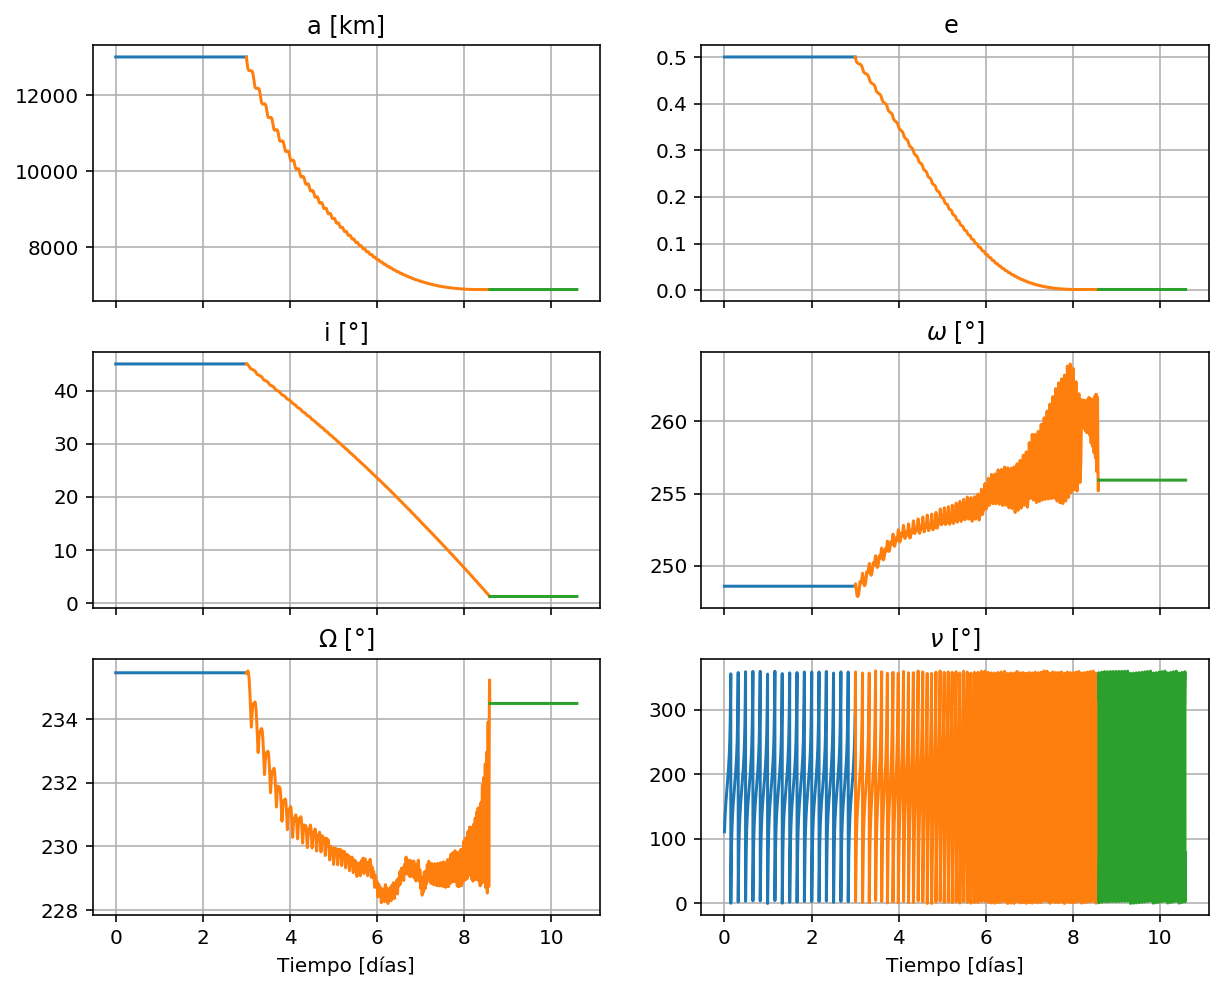

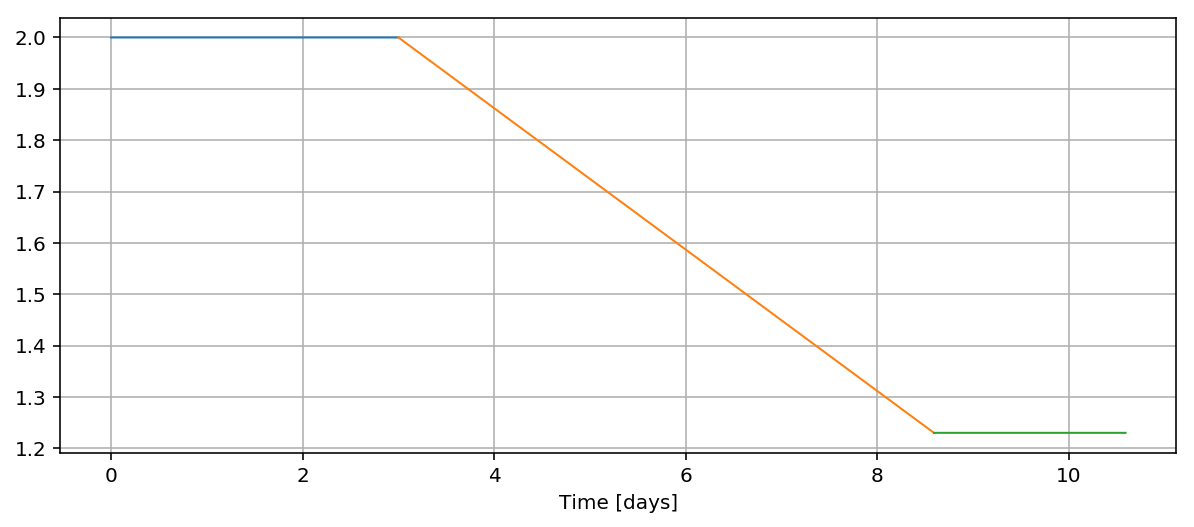

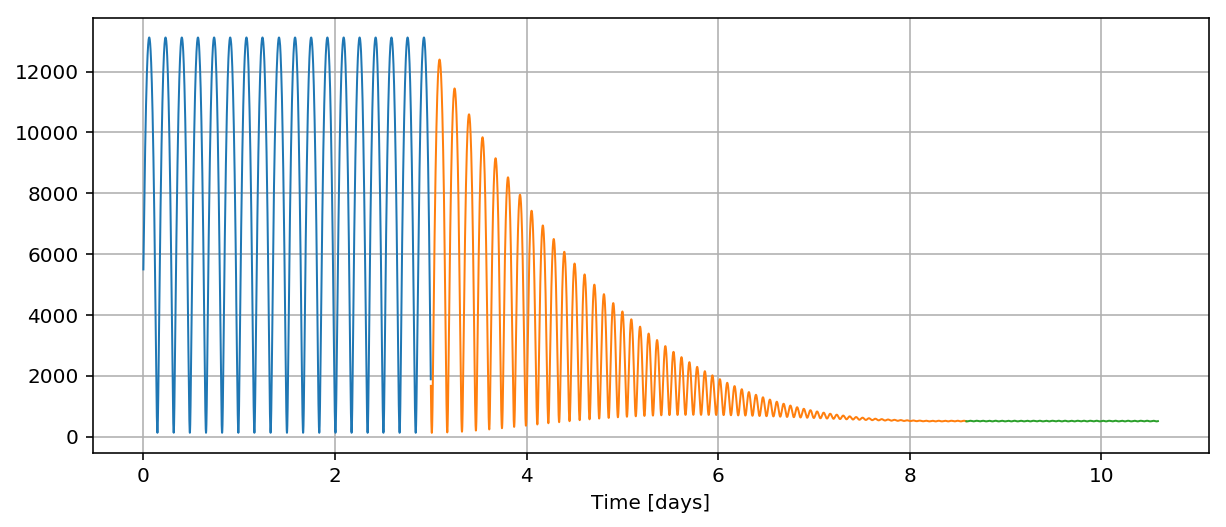

In [8]:
maneuver.makeReport();
display(maneuver.ipvPlot3D());
maneuver.plot("coe");
maneuver.plot("singleItem",maneuver.history.propMass);
maneuver.plot("singleItem",np.linalg.norm(maneuver.history.r,axis=1)/1000-constants.Re/1000);